# Convolutional Neural Networks
by omarelsayed


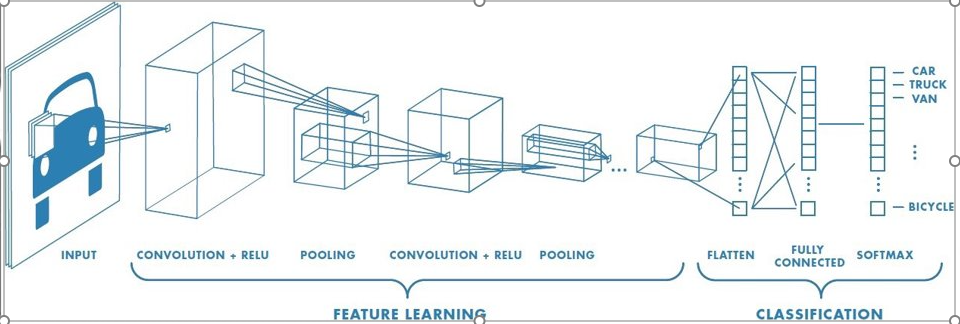

## Convolutional layers consists of "filters" that can detect a repeating pattern in the images In the first layers it only detect basic patterns like lines and circles.​ 

## Deeper in the layers it detects the specific image properties.​


# Why cnn ? why not flatten the images and use plain ANN ?
### With ANN, concrete data points must be provided. For example, in a model where we are trying to distinguish between dogs and cats, the width of the noses and length of the ears must be explicitly provided as data points.

### When using CNN, these spatial features are extracted from image input. This makes CNN ideal when thousands of features need to be extracted. Instead of having to measure each individual feature, CNN gathers these features on its own.

# How does these feature maps look like?
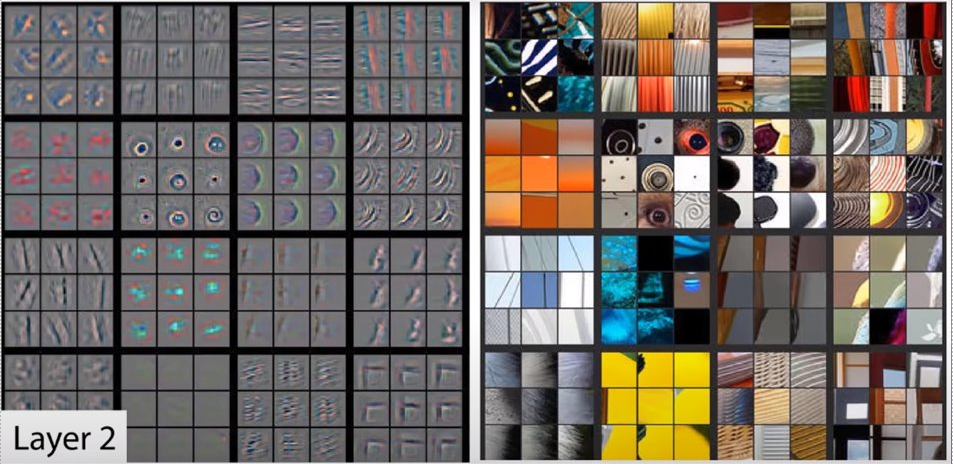

# Important Note : CNN is more powerful for data with alot of features that needs to be extracted , for example : to classify a dog you need to know features like dog's ear , fur , and face , let's see how the feature map for that looks like
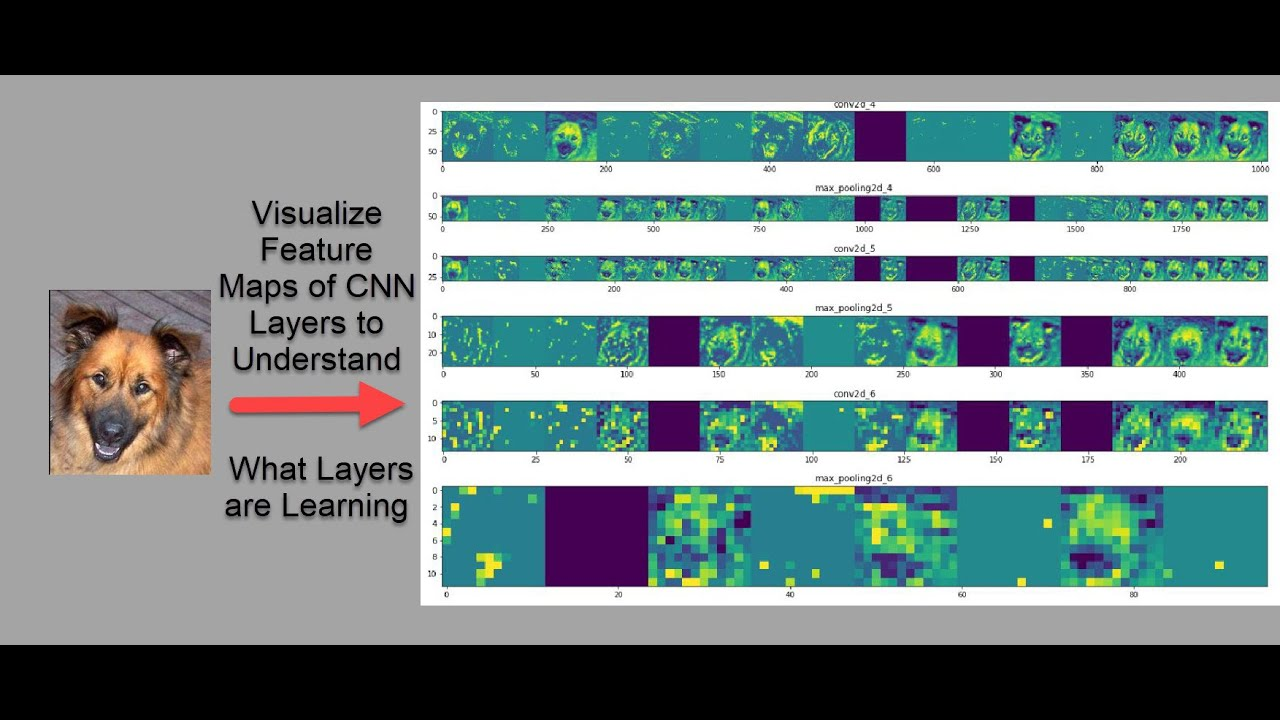

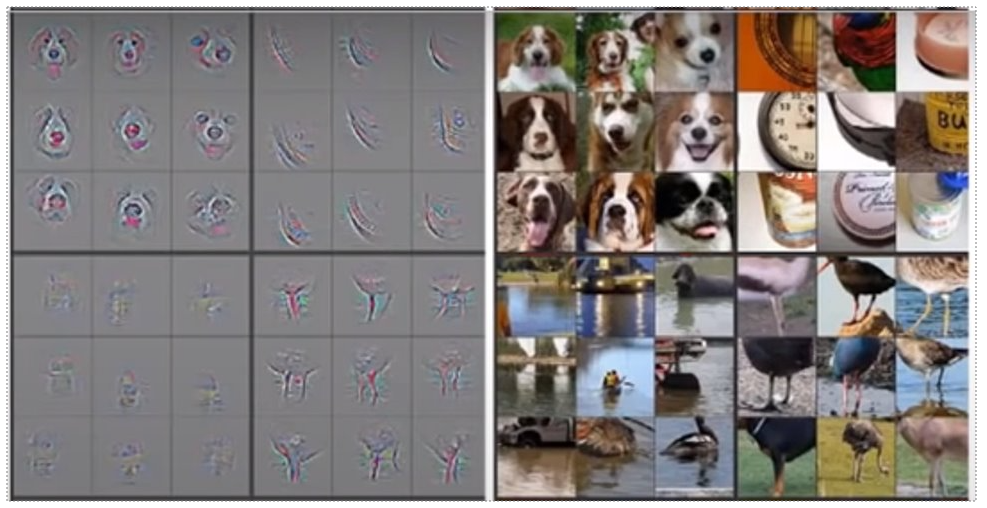

# So , What's Convolution ?

#### convolution to an image with a filter : first we put the filter on the top left side of the image and we do "pixel - wise " multplication , means that we multiply every pixel with it's corresponding filter value , then we sum those results , that gives us a single pixel value , then we slide that filter over all of the array to get the output

#### a good example is here https://setosa.io/ev/image-kernels/

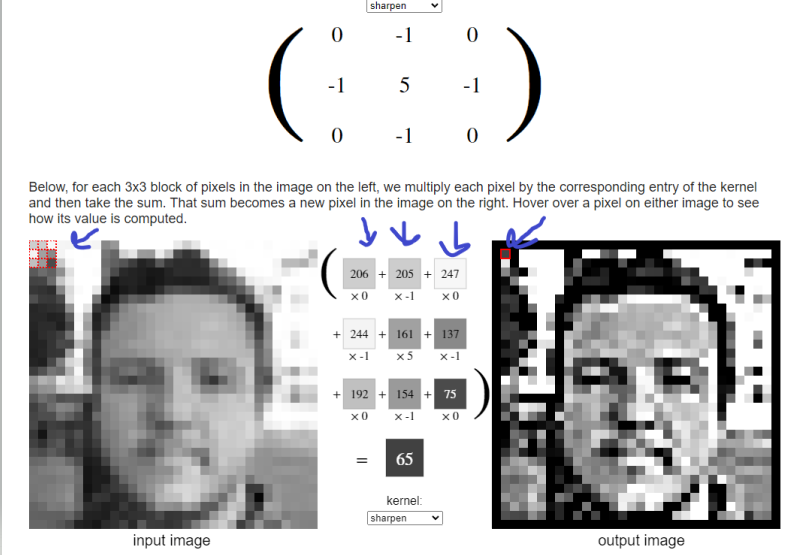


#### 206 , 205 , 247 , etc are the pixel value of the original images , each multplied by the given filter "this filter sharpens the image btw" , and then sum these values.

#### Now you know what convolution is , let's get more technical

#### of course the output is going to be smaller every time we do convloution by a filter with size NxN , can be defined as follows
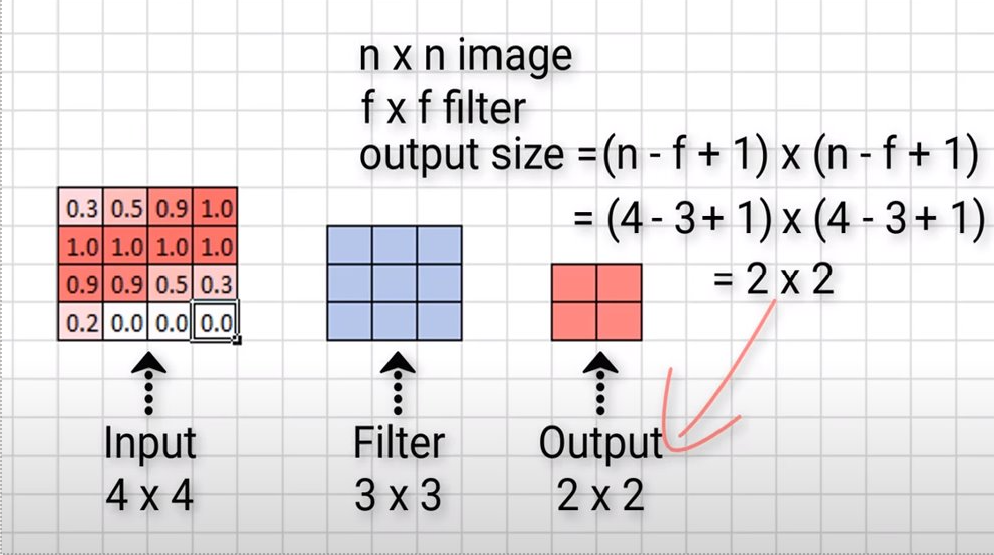

### We can add Padding layers that adds zeros around the output to keep the output size large

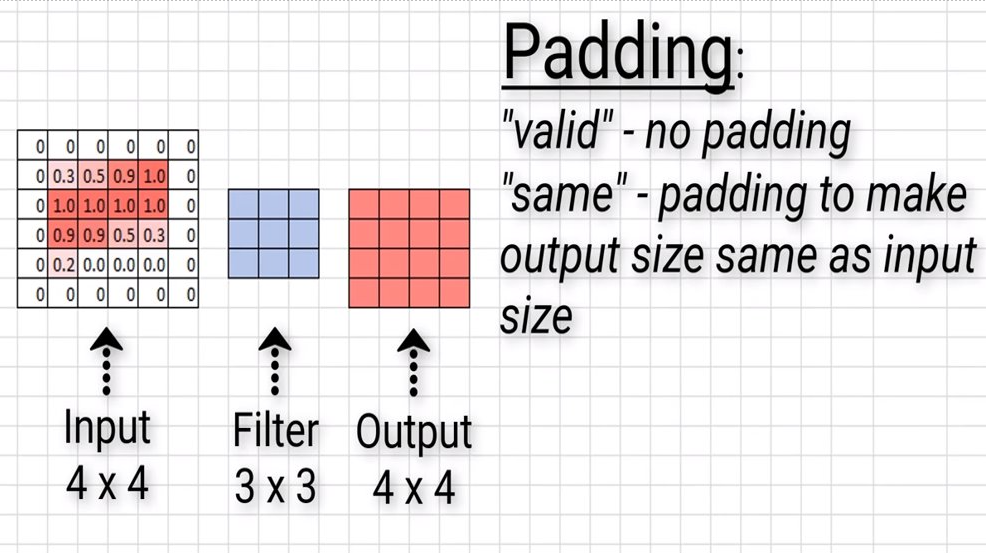

#### with padding the convolution results is gonna be partialy accurate due to the zeros but the size is kept.

### With images with large sizes like 1920x1080 the convolution is going to take too long to compute , so we can do a STRIDED CONVOLUTION 

# Strided Convolution : sliding the filter more than one pixel at a time
### The hop length of the convolution process​

### Notice how the shape changes
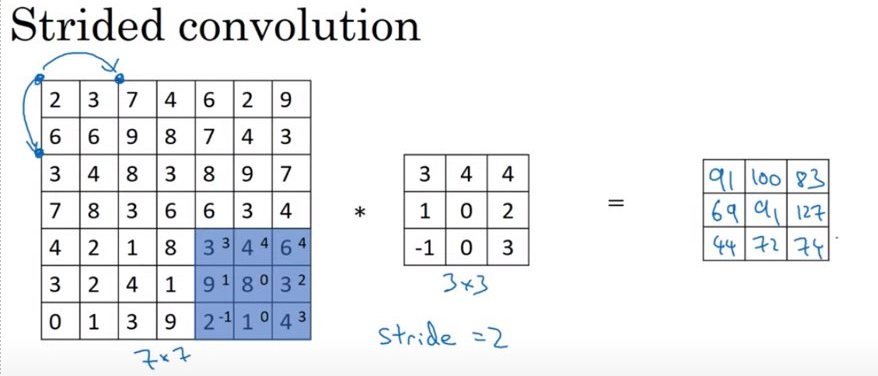

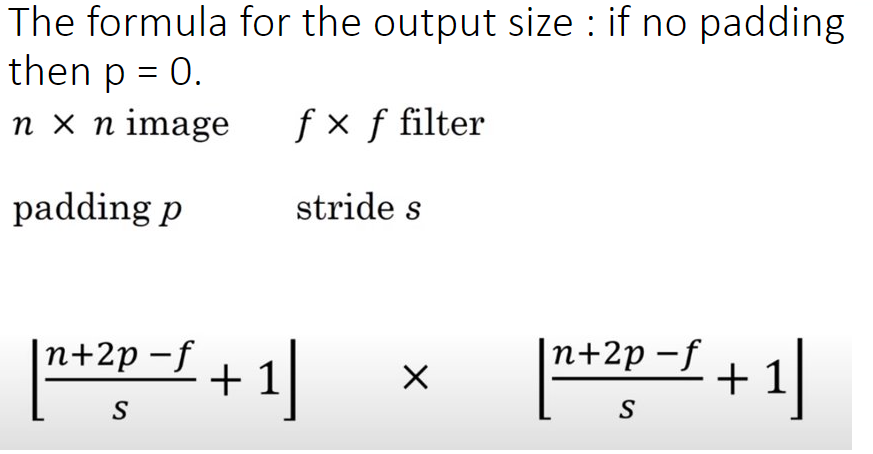

### So how do we do this for colored images ? RGB color spaces needs 3 filter for each channel , Red , green , blue , this is going to look as follows

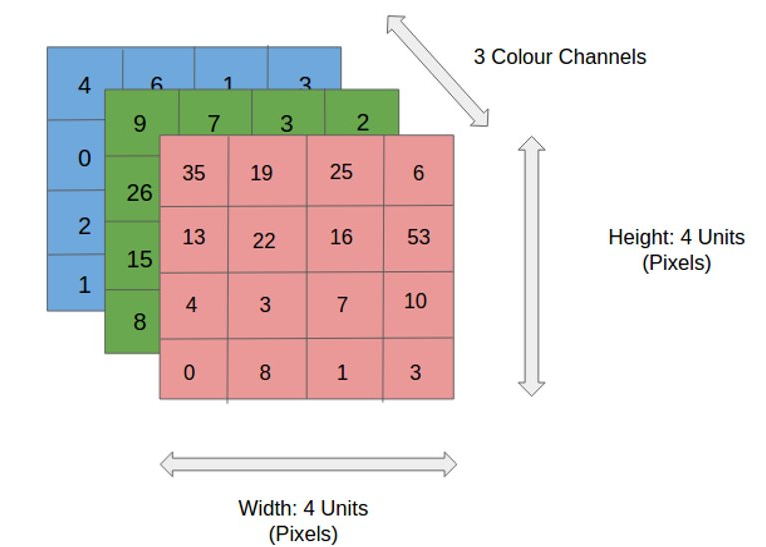

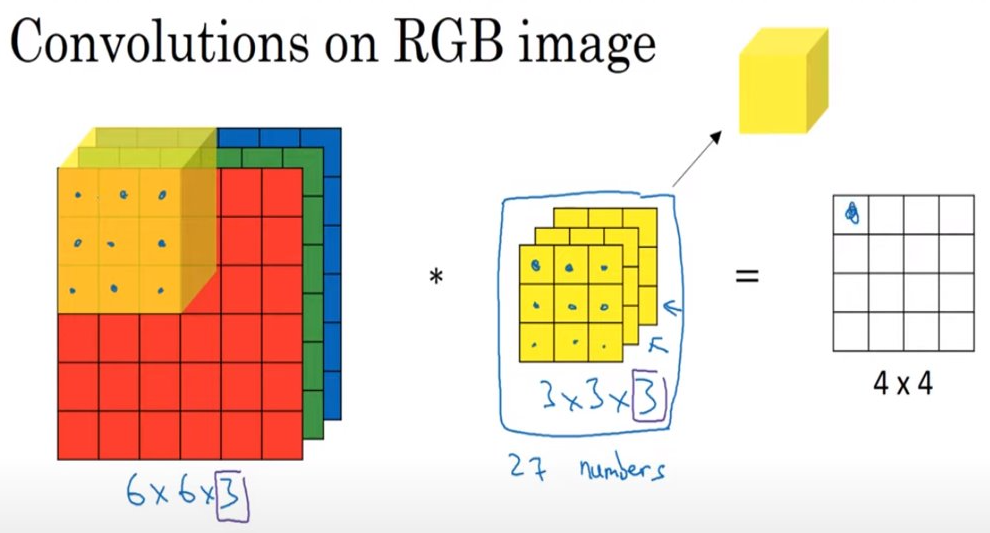

### How do you get multiple channels in the output? By doing multiple convolutions on multiple filters with different values , as we know the neural network's weight is going to be initialized differently , this allows us for learning multiple features
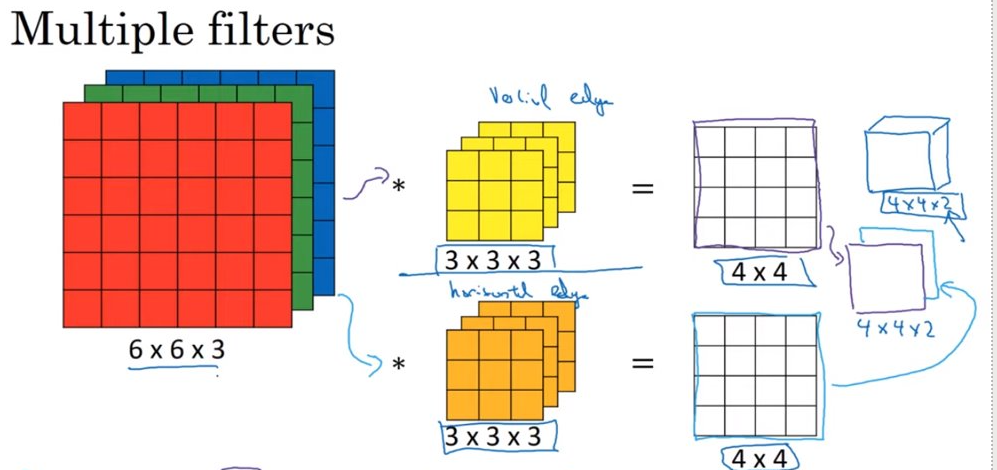


### So an example of a convolutional layer is first doing convolution with the filters , then stacking those filters together , then passing them to an activation function like relu or sigmoid
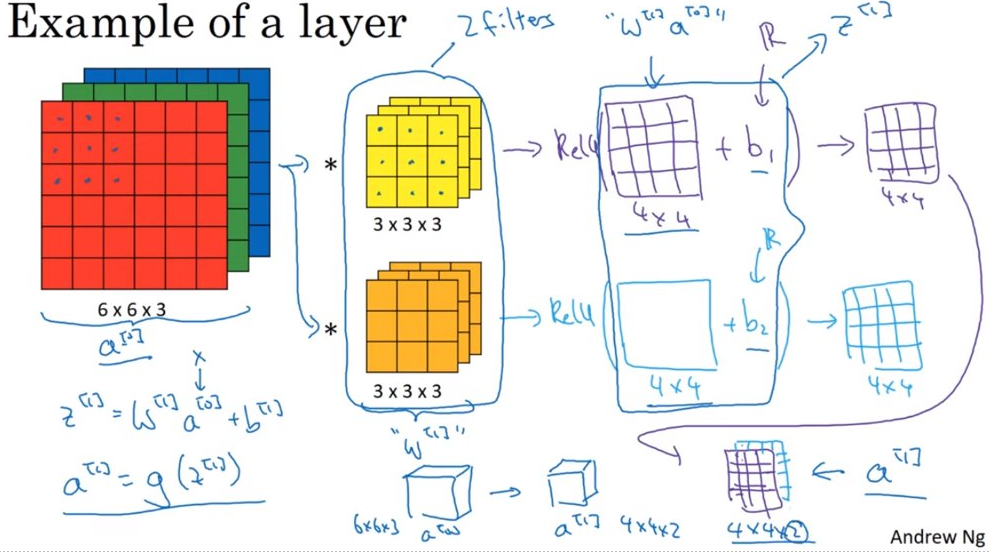

Convolutional layers in a convolutional neural network systematically apply learned filters to input images in order to create feature maps that summarize the presence of those features in the input.

Convolutional layers prove very effective, and stacking convolutional layers in deep models allows layers close to the input to learn low-level features (e.g. lines) and layers deeper in the model to learn high-order or more abstract features, like shapes or specific objects.

A limitation of the feature map output of convolutional layers is that they record the precise position of features in the input. This means that small movements in the position of the feature in the input image will result in a different feature map. This can happen with re-cropping, rotation, shifting, and other minor changes to the input image.

A common approach to addressing this problem from signal processing is called down sampling. This is where a lower resolution version of an input signal is created that still contains the large or important structural elements, without the fine detail that may not be as useful to the task.

Down sampling can be achieved with convolutional layers by changing the stride of the convolution across the image. A more robust and common approach is to use a pooling layer.

A pooling layer is a new layer added after the convolutional layer. Specifically, after a nonlinearity (e.g. ReLU) has been applied to the feature maps output by a convolutional layer; for example the layers in a model may look as follows:

Input Image
Convolutional Layer
Nonlinearity
Pooling Layer
The addition of a pooling layer after the convolutional layer is a common pattern used for ordering layers within a convolutional neural network that may be repeated one or more times in a given model.

The pooling layer operates upon each feature map separately to create a new set of the same number of pooled feature maps.

Pooling involves selecting a pooling operation, much like a filter to be applied to feature maps. The size of the pooling operation or filter is smaller than the size of the feature map; specifically, it is almost always 2×2 pixels applied with a stride of 2 pixels.

This means that the pooling layer will always reduce the size of each feature map by a factor of 2, e.g. each dimension is halved, reducing the number of pixels or values in each feature map to one quarter the size. For example, a pooling layer applied to a feature map of 6×6 (36 pixels) will result in an output pooled feature map of 3×3 (9 pixels).

The pooling operation is specified, rather than learned. Two common functions used in the pooling operation are:

Average Pooling: Calculate the average value for each patch on the feature map.
Maximum Pooling (or Max Pooling): Calculate the maximum value for each patch of the feature map.
The result of using a pooling layer and creating down sampled or pooled feature maps is a summarized version of the features detected in the input. They are useful as small changes in the location of the feature in the input detected by the convolutional layer will result in a pooled feature map with the feature in the same location. This capability added by pooling is called the model’s invariance to local translation.


### So convolutions will get every detail in the img but what is there's alot of noise that we don't need to know? for example look at this image 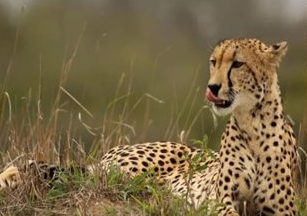
### all we need to know is the face of the cheetah , we don't need to understand about the grass , that also helps generalizing better
### So how do we do max pooling ? we identify a 2x2 kernel that will move along the image , for every 2x2 part of the image we take the MAX of that part , that's why it's called Max Pooling , we can use also average pooling which does the same thing but averages.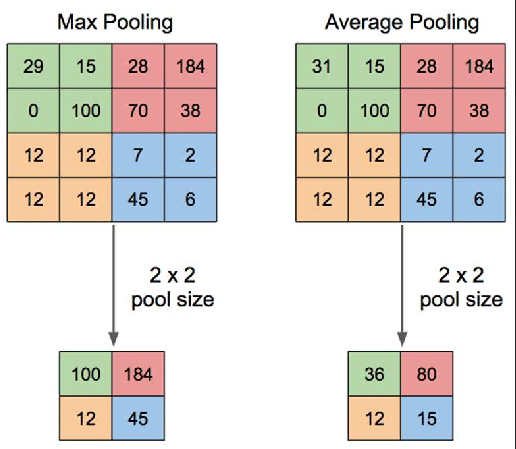
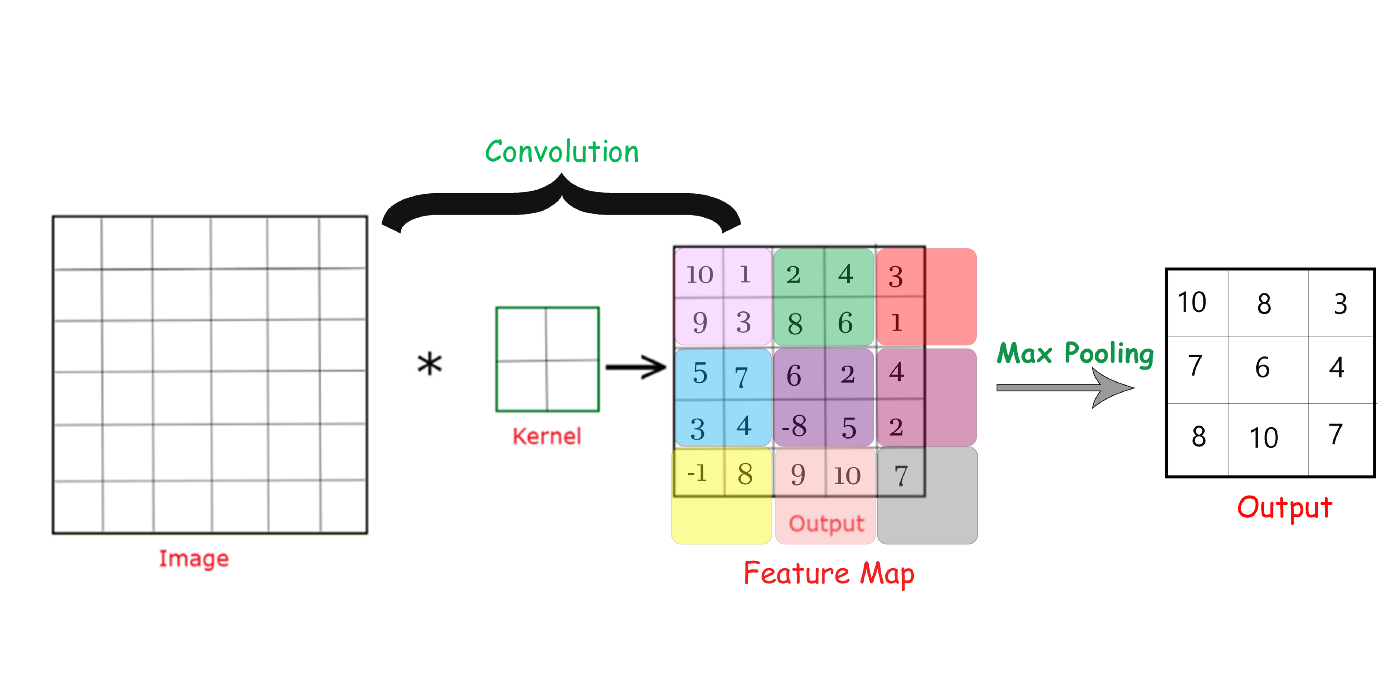

## Before the output layer in the network we flatten all these features on one vector and then connect an output layer with a specific activation function that outputs the propability for each class.  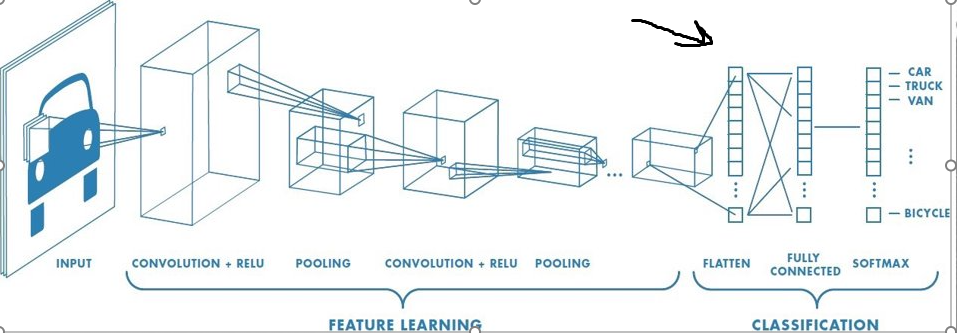

### We will use keras to show a sample code.

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Conv2D , MaxPool2D
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Fashion Mnist
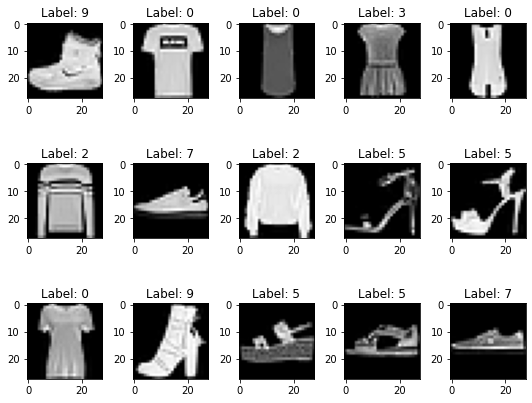

In [2]:
'''
We will try to Classify fashion mnist dataset , which is a dataset that has 10 different classes of clothing.
'''
(x_train , y_train) , (x_test , y_test)=tf.keras.datasets.fashion_mnist.load_data()
x_train=x_train.reshape((60000,28,28,1)) #the extra shape is for the channel , as the images are grayscale it's only 1 , if rgb then it wouldve been 3
x_test=x_test.reshape((10000 , 28 , 28 , 1))

In [3]:
#Scaling to make the values between 0 and 1 for SGD to convert faster
x_train = (x_train / 255) 
x_test = (x_test / 255) 

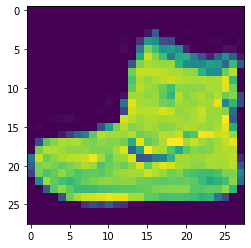

In [4]:
#visualise a sample
plt.imshow(x_train[0].reshape((28,28)))

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
#Create the model
model=Sequential()
model.add( Conv2D(filters =32 , #number of filters
                 kernel_size=(3,3) , #filter size 
                 strides=(1,1) , #strided or  not?
                 activation ='relu' , #the activation function
                 padding = 'valid' ,  # padding same or valid
                 input_shape=(28, 28, 1))) # for the first layer u need to specify the input shape

model.add(MaxPool2D( pool_size=(2,2) , padding='valid' )) #Pooling layer

model.add(Flatten()) #Flatten those feature maps to get one vector , then You can add linear layers that are previously disccused

model.add(Dense(100,activation='relu')) #Linear Layer

model.add(Dense(10 , activation='softmax')) #Output Layer
#Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy']) #SGD -> Stochastic gradien descent

In [ ]:
#data augmentation
'''
We do data augmentation to increase our data and to generalize better , we do operations on images like zoom , 
flip , rotate
'''
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest").flow(x_train , to_categorical(y_train))

In [ ]:
#Create the call backs
'''
EarlyStopping : stop if the accuracy isn't changed for a certation number of epochs "patience"
'''
from keras.callbacks import EarlyStopping

early=EarlyStopping(patience=4,monitor='val_loss') 
#Train the model
model.fit(train_datagen ,batch_size=32 ,  epochs=30,
   validation_data=(x_test , to_categorical(y_test)) , callbacks=[early]
)

Epoch 1/30
1875/1875 [==============================] - 32s 17ms/step - loss: 1.0712 - accuracy: 0.6177 - val_loss: 0.6825 - val_accuracy: 0.7485
Epoch 2/30
1875/1875 [==============================] - 31s 16ms/step - loss: 0.7733 - accuracy: 0.7124 - val_loss: 0.6207 - val_accuracy: 0.7527
Epoch 3/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6941 - accuracy: 0.7380 - val_loss: 0.5578 - val_accuracy: 0.7874
Epoch 4/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6464 - accuracy: 0.7557 - val_loss: 0.5222 - val_accuracy: 0.8035
Epoch 5/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6166 - accuracy: 0.7682 - val_loss: 0.5226 - val_accuracy: 0.7945
Epoch 6/30
1875/1875 [==============================] - 31s 17ms/step - loss: 0.5985 - accuracy: 0.7738 - val_loss: 0.5104 - val_accuracy: 0.8096
Epoch 7/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5764 - accuracy: 0.7840 - val_loss: 0.4942 -

In [9]:
test_img=x_test[0]
test_img.shape

(28, 28, 1)

In [10]:
test_img=test_img.reshape((1,28,28,1)) # the extra one at the start is the batch size , you can predict on multiple batches at the same time
np.argmax(model.predict(test_img))

9

In [11]:
y_test[0]

9